1. Wyznacza Pan woksele stanowiące różnicę między obrysami. Np. takie woksele "zielone", które mają styczność z co najmniej jednym wokselem "czerwonym". To daje Panu cienką warstwę stanowiącą płaszczyznę między półkulami. Ma ona maksymalnie X z Y punktów (czyli np. 400x 300)
2. Z tej płaszczyzny generuje Pan "kratkę" w taki sposób, jak sugeruję powyżej. Odrzucając 90% warstw dostanie Pan ~40x30 -> 1200 punktów.
3. Traktuje Pan te punkty jako funkcję (X,Y -> Z) czyli (punkt w płaszczyźnie koronalnej, punkt w płaszczyźnie horyzontalnej) -> punkt w płaszczyźnie środkowo bocznej. Korzystamy tutaj z faktu, że punkty "raczej" na siebie nie zachodzą, narysowana ręcznie płaszczyzna nie powinna istotnie odbiegać od funkcji (x,y) -> z. 
4. Traktując otrzymane zbiór właśnie jako f(x,y) -> z. (można sobie go narysować w matplotlibie) robi Pan interpolację brakujących punktów.

1. Znaleźć  takie woksele "zielone" (mask_val=1), które mają styczność z co najmniej jednym wokselem "czerwonym". (mask_val=2).
Otrzymuję cienką warstwę stanowiącą płaszczyznę między półkulami.
Ma ona maksymalnie X z Y punktów (czyli np. 400x 300)
2. Z tej płaszczyzny generuje Pan "kratkę" w taki sposób, jak sugeruję powyżej.
Czyli w jaki? (psucie maski?)
 Odrzucając 90% warstw dostanie Pan ~40x30 -> 1200 punktów.

3. Traktuje jako f(X,Y -> Z) czyli (punkt w płaszczyźnie koronalnej, punkt w płaszczyźnie horyzontalnej) -> punkt w płaszczyźnie środkowo bocznej. Korzystamy tutaj z faktu, że punkty "raczej" na siebie nie zachodzą, narysowana ręcznie płaszczyzna nie powinna istotnie odbiegać od funkcji (x,y) -> z. 
4. Traktując otrzymane zbiór właśnie jako f(x,y) -> z. (można sobie go narysować w matplotlibie) robi Pan interpolację brakujących punktów.
(interpolacja funkcji)

In [3]:
import os, numpy as np, matplotlib.pyplot as plt, nibabel as nib
from nibabel.testing import data_path
from scipy.interpolate import griddata
from tqdm import tqdm
import pandas as pd
import sys
sys.path.append('/home/soutys/Praca/konektomika/split_hemispheres/symmetry_fork/symmetry/PYs')
from interpolation import *

In [4]:
def show(self, cmap=None):
        cmap = cmap or plt.cm.gray
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))
        ax.imshow(self, cmap=cmap)
        ax.set_axis_off()
        #plt.show()
        plt.ioff()
        plt.close()
        return fig

### Załadowujemy trójwymiarową maskę z pliku .nii

In [ ]:
break_mask(input_path='../../data/001_25_mask.nii',
              output_path='img_mask_data_broken_1.nii.gz',
              direction=1)

In [11]:
import glob
glob.glob('../../../../data/001_25_mask.nii.gz')

['../../../../data/001_25_mask.nii.gz']

### Teraz nalezy ocenic blad takiej interpolacji
Ale to zrobimy pozniej.
(img_mask - interp_mask) **2 ( element wise )


### Teraz interpolacja z konturow.

Dla kazdego skrawka w plaszczyznie koronalnej.

img_mask_data[:,y,:]

wizualizujemy to i bierzemy 

In [12]:
p = '../../../../data/001_25_mask.nii.gz'
img_mask = nib.load(p)

affine = img_mask.get_affine()
img_mask_data = img_mask.get_fdata()

#img_mask_broken = break_mask(img_mask_data, direction=1)
#img_mask_data = img_mask_broken 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  after removing the cwd from sys.path.


{{fig_93}}

In [14]:
slice_i = img_mask_data[:,93,:]
np.unique(slice_i)

array([0., 1., 2.])

Wyznacza Pan woksele stanowiące różnicę między obrysami. Np. takie woksele "zielone", które mają styczność z co najmniej jednym wokselem "czerwonym". To daje Panu cienką warstwę stanowiącą płaszczyznę między półkulami. Ma ona maksymalnie X z Y punktów (czyli np. 400x 300)

In [44]:
def check3D(img, y_i, x_i, z_i):
    j_lim, k_lim, l_lim = img.shape
    for j in range(y_i-1, y_i+1+1):
        if 0<=j<=j_lim-1:
            for k in range(x_i-1, x_i+1+1):
                if 0<=k<=k_lim-1:
                    for l in range(z_i-1, z_i+1+1):
                        if 0<=l<=l_lim-1:
                            if img[j,k,l]==1:
                                return True
    return False


def check2D(slice_i,y_i,x_i):
    for j in range(y_i -1,y_i+1+1):
        for k in range(x_i -1,x_i+1+1):
            if slice_i[j,k]==1:
                return True
    return False

def get_border2D(slice_i):
    y, x = np.where(slice_i==2)
    border_y = []
    border_x = []
    for i in range(len(x)):
        x_i = x[i]
        y_i = y[i]
        if check2D(slice_i,y_i,x_i):
            border_x.append(x_i)
            border_y.append(y_i)
    return border_y, border_x
    
def get_border3D(img):
    y, x, z = np.where(img==2)
    border_y = []
    border_x = []
    border_z = []
    for i in range(len(y)):
        y_i = y[i]
        x_i = x[i]
        z_i = z[i]
        if check3D(img, y_i, x_i, z_i):
            border_y.append(y_i)
            border_x.append(x_i)
            border_z.append(z_i)
    return border_y, border_x, border_z


mamy {{len(border_y)}} punktow. zostawiamy co setny.

In [46]:
border_y, border_x, border_z = get_border3D(img_mask_data)

In [53]:
chosen_points = np.random.choice(len(border_y), int(len(border_y)/100.0), replace=False)

In [75]:
len(chosen_points)
border_chosen_y = []
border_chosen_x = []
border_chosen_z = []
for i in chosen_points:
    border_chosen_y.append(border_y[i])
    border_chosen_x.append(border_x[i])
    border_chosen_z.append(border_z[i])

In [98]:
np.max(border_chosen_x)

389

In [107]:
from scipy.interpolate import griddata

#ze wzgledu na to ze plaszczyzna podzialu jest bardziej prostopadla do osi y
#wybieram y do interpolacji
grid_x, grid_z = np.mgrid[np.min(border_chosen_x):np.max(border_chosen_x):1,
                          np.min(border_chosen_z):np.max(border_chosen_z):1]
points = np.rot90(np.array([border_chosen_y,border_chosen_z]))#[::step]
points = np.rot90(np.array([border_chosen_y,border_chosen_z]))#[::step]
print(points.shape)
values = np.array(border_chosen_x)#.transpose()#[::step]
print(values.shape)
grids = griddata(points, values, (grid_y, grid_z),
                             method='linear')


(723, 2)
(723,)


In [108]:
grid_y

array([[ 5,  5,  5, ...,  5,  5,  5],
       [ 6,  6,  6, ...,  6,  6,  6],
       [ 7,  7,  7, ...,  7,  7,  7],
       ...,
       [46, 46, 46, ..., 46, 46, 46],
       [47, 47, 47, ..., 47, 47, 47],
       [48, 48, 48, ..., 48, 48, 48]])

In [110]:
grids

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [88]:
img_mask_data.shape

(232, 405, 280)

In [105]:
grids
img_mask_data_interp = copy.deepcopy(img_mask_data)
offset_y = np.min(border_chosen_y)
offset_z = np.min(border_chosen_z)
x_max = img_mask_data.shape[1]-1
for i in range(grids.shape[0]):
    for j in range(grids.shape[1]):
        if np.isfinite(grids[i,j]):
            x = min(x_max,int(round(grids[i,j])))
            x = max(0,x)
            img_mask_data_interp[i,x,j]=3

In [ ]:
def fill_interp_contours(img_mask_data, contours={},
                         offset=50):
    '''
    
    '''
    import copy
    interps = []
    for y in range(img_mask_data.shape[1]):
        slice_i = copy.deepcopy(img_mask_data[:,y,:])
        for mask in contours.keys():
         gorny_grid_z2, dolny_grid_z2 = [contours[mask][i] for i in [
                  'up','down']]
         zvals = gorny_grid_z2[:,y]
         zvals_d = dolny_grid_z2[:,y]
         for x in range(gorny_grid_z2.shape[0]):
            #print(zvals[x])
            if np.isfinite(zvals[x]):
                slice_i[int(round(zvals[x])), x+offset] = mask
            if np.isfinite(zvals_d[x]):
                slice_i[int(round(zvals_d[x])), x+offset] =mask
            if np.isfinite(zvals[x]) and np.isfinite(zvals_d[x]):
                for middle_z in range(int(round(zvals_d[x])),int(round(zvals[x]))):
                    slice_i[middle_z, x+offset] =mask
        interps.append(slice_i)
    return np.transpose(np.dstack(interps),(0,2,1))


In [49]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [48]:
#now to save border in itk snapable form
border_img = np.zeros_like(img_mask_data)
for i in range(len(border_y)):
    border_img[border_y[i], border_x[i], border_z[i]] = 1
fa = nib.Nifti1Image(border_img, affine)
nib.save(fa, 'border.nii.gz')


In [56]:
border_img = np.zeros_like(img_mask_data)
for i in chosen_points:
    border_img[border_y[i], border_x[i], border_z[i]] = 1
fa = nib.Nifti1Image(border_img, affine)
nib.save(fa, 'border_chosen_points.nii.gz')

In [47]:
img_border = copy.deepcopy(img_mask_data)
for i in range(len(border_y)):
    img_border[border_y[i], border_x[i], border_z[i]] = 3
fa = nib.Nifti1Image(img_border, affine)
nib.save(fa, 'img_border.nii.gz')

In [106]:
fa = nib.Nifti1Image(img_mask_data_interp, affine)
nib.save(fa, 'img_mask_data_interp.nii.gz')

In [55]:
img_border = copy.deepcopy(img_mask_data)
for i in chosen_points:
    img_border[border_y[i], border_x[i], border_z[i]] = 3
fa = nib.Nifti1Image(img_border, affine)
nib.save(fa, 'img_border_chosen_points.nii.gz')

In [ ]:
#teraz zrobic kratke z bordera 
# wybrac tylko co dziesiata kratke (jakims randomem czy innym gaussem)
# 
# to teraz border_z = f(border_x, border_y)

In [ ]:
prawidlowa_interpolacja_konturow_2D(img_mask_data, direction=1)

In [ ]:
plt.scatter(border_x, border_y, border_z)

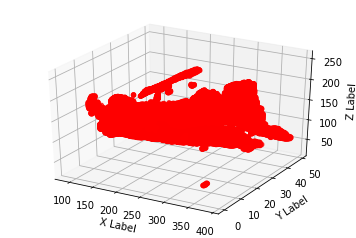

In [57]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
#for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
#    xs = randrange(n, 23, 32)
#    ys = randrange(n, 0, 100)
#    zs = randrange(n, zlow, zhigh)
ax.scatter(border_x, border_y, border_z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [15]:
fig_93_2 = show(slice_i==2)
y2, x2 = np.where(slice_i==2)
df = pd.DataFrame()
df['y'] = y2
df['x'] = x2
df['y'].min()
gorny_kontur = df.groupby('x').min().reset_index()
#gorny_kontur.plot(kind='scatter', x='x', y='y')
dolny_kontur = df.groupby('x').max().reset_index()
#dolny_kontur.plot(kind='scatter', x='x', y='y')
kontur = pd.concat([gorny_kontur, dolny_kontur])
#kontur.plot(kind='scatter', x='x', y='y')
#plt.gca().invert_yaxis()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 81/81 [00:00<00:00, 1929.68it/s]


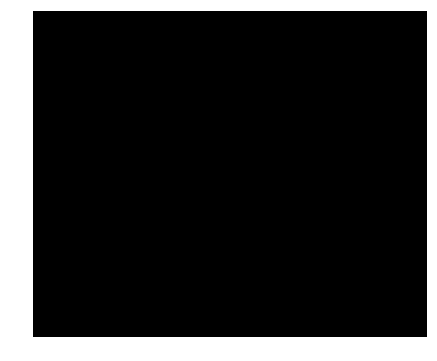

In [14]:
show(np.nan_to_num(img_mask_broken[:,93,:]))

### Wybór skrawka
Do analizy wybrałem skrawek o numerze 93, bo półkule są na nim dobrze oddzielone.

skrawek y=93  | skrawek y=93 (druga polkula)
- | - 
{{fig_93}} | {{fig_93_2}}

### Bierzemy gorny i dolny kontur:
{{kontur.plot(kind='scatter', x='x', y='y'); plt.gca().invert_yaxis()}}

### powiedzmy ze wyglada to prawie ok;
oprocz tego ze kontur sie nie zamyka ale to wezmiemy dla kazdego x wypelnimy y pomiedzy
konturami dwojka
(nalozymy taka maske albo cus)
jest problem z tymi dwoma kropkami.

### to teraz wybierzmy sobie dolny kontur i znajdzmy dolny kontur dla kazdego skrawka w plaszczyznie koronalnej


In [32]:
#pd.DataFrame(grid_z2[:,93],columns=['y']).reset_index().plot()

NameError: name 'grid_x' is not defined

In [16]:
dolny_grid_z2, gorny_grid_z2 = prawidlowa_interpolacja_konturow_2D(img_mask_data, direction=1)
con_interp = fill_interp_contours(img_mask_data, gorny_grid_z2, dolny_grid_z2)

100%|██████████| 405/405 [00:03<00:00, 130.61it/s]


In [65]:
#pd.DataFrame(grid_z2[:,93],columns=['y']).reset_index().plot(kind='scatter',x='index',y='y')

In [22]:
f1 = show(np.nan_to_num(con_interp[:,94,:]))
f2 = show(np.nan_to_num(img_mask_data[:,94,:]))

skrawek y=93  | skrawek y=93 (interpolowany)
- | - 
{{f2}} | {{f1}}

Zadzialalo, chociaz popsulem maske z krokiem 5 a interpolowalem z krokiem 2

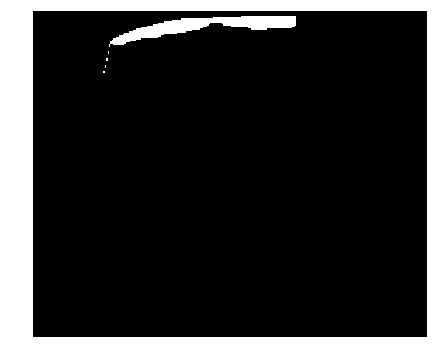

In [26]:
show(np.nan_to_num(con_interp[:,96,:]))

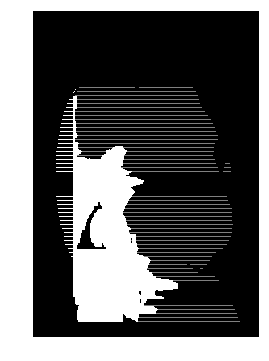

In [27]:
show(np.nan_to_num(con_interp[30,:,:]))

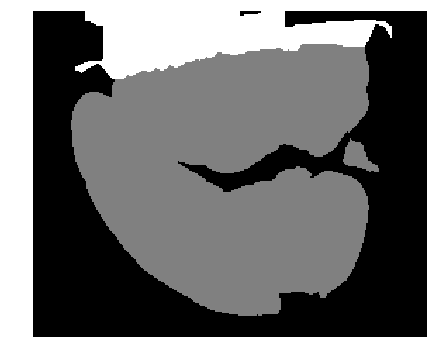

In [30]:
show(np.nan_to_num(con_interp[:,350,:]))

In [142]:
points = np.random.rand(1000, 2)

In [143]:
point_list = []
for i in tqdm(range(x_max)):
    for j in range(0, z_max, 2):
        point_list.append([i,j])
points = np.array(point_list)

100%|██████████| 185/185 [00:00<00:00, 2379.30it/s]


In [144]:
values = img_mask_data[points[:,0],points[:,1],points[:,2]]

IndexError: index 2 is out of bounds for axis 1 with size 2

### trzeba sie zastanowic nad inputem
Najwygodniej zeby inputem byl array w ktorym po prostu w nieokreslonych
komorkach bylo None

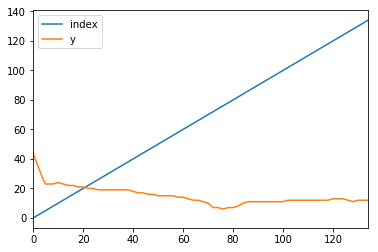

In [146]:
#trzeba zmienic grida zeby sie zaczynal tak od 25

In [114]:
pd.DataFrame(points, columns=['x','z'])

,x,z
0,0,0
1,0,2
2,0,4
3,0,6
4,0,8
5,0,10
6,0,12
7,0,14
8,0,16
9,0,18
